In [3]:
import pandas as pd
import numpy as np 
df = pd.read_csv('Glassdoor_Jobs.csv')
df.head()

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  ...  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private  ...   
1   Baltimore, MD        10000+ employees     1984  Other Organization  ...   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private  ...   
3    Richland, WA  1001 to 5000 employees     1965          Government  ...   
4    New York, NY     51 to 200 employees     1998   Company - Private  ...   

  avg_salary                              company_txt job_state same_state  \
0       72.0                      Tecolote Research\n        NM          0   
1       87.5  University of Maryland Medical System\n        MD          0   
2       85.0                                KnowBe4\n        FL          1   
3       76.5                                   PNNL\n        WA          1   
4      114.5                     Affinity Solutions\n        NY          1   

   age  python_yn  R_yn  spark  aws excel  
0   47          1     0      0    0     1  
1   36          1     0      0    0     0  
2   10          1     0      1    0     1  
3   55          1     0      0    0     0  
4   22          1     0      0    0     1  

[5 rows x 28 columns]

# Summarize the data set

In [4]:
# print properties and attributes in the dataset
import pandas as pd

info=df.info()
topvalues=df.head()
description=df.describe()

print('\n------------------------------------Description--------------------------\n',description)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

# Data Manipulations

In [5]:
#before encoding the coloumns
df.describe()

Rating      Founded      hourly  employer_provided  min_salary  \
count  742.000000   742.000000  742.000000         742.000000  742.000000   
mean     3.633693  1837.222372    0.032345           0.022911   74.068733   
std      0.720715   496.934294    0.177034           0.149721   31.869282   
min      0.000000     0.000000    0.000000           0.000000   10.000000   
25%      3.300000  1939.000000    0.000000           0.000000   52.000000   
50%      3.700000  1988.000000    0.000000           0.000000   69.500000   
75%      4.000000  2007.000000    0.000000           0.000000   91.000000   
max      5.000000  2019.000000    1.000000           1.000000  202.000000   

       max_salary  avg_salary  same_state         age   python_yn        R_yn  \
count  742.000000  742.000000  742.000000  742.000000  742.000000  742.000000   
mean   127.183288  100.626011    0.557951   46.659030    0.528302    0.002695   
std     46.909006   38.855948    0.496965   53.719654    0.499535    0.051882   
min     16.000000   13.500000    0.000000    0.000000    0.000000    0.000000   
25%     96.000000   73.500000    0.000000   11.000000    0.000000    0.000000   
50%    124.000000   97.500000    1.000000   24.000000    1.000000    0.000000   
75%    155.000000  122.500000    1.000000   59.000000    1.000000    0.000000   
max    306.000000  254.000000    1.000000  276.000000    1.000000    1.000000   

            spark         aws       excel  
count  742.000000  742.000000  742.000000  
mean     0.225067    0.237197    0.522911  
std      0.417908    0.425651    0.499812  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    1.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000

# Preprocess the data 
# Drop rows with missing salary information 
# Encoding categorical variables 
# Defining features and target variables

In [6]:

import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 

# Preprocess the data
df['min_salary'] = pd.to_numeric(df['min_salary'], errors='coerce')
df['max_salary'] = pd.to_numeric(df['max_salary'], errors='coerce')
df['avg_salary'] = pd.to_numeric(df['avg_salary'], errors='coerce')

# Drop rows with missing salary information
df = df.dropna(subset=['min_salary', 'max_salary', 'avg_salary'])

# Encoding categorical variables
le_job_title = LabelEncoder()
df['job_title_encoded'] = le_job_title.fit_transform(df['Job Title'])

le_company = LabelEncoder()
df['company_encoded'] = le_company.fit_transform(df['Company Name'])

le_location = LabelEncoder()
df['location_encoded'] = le_location.fit_transform(df['Location'])

# Defining features and target variables
X = df[['job_title_encoded', 'company_encoded', 'location_encoded', 'python_yn', 'spark', 'aws', 'excel']]
y_min = df['min_salary']
y_max = df['max_salary']
y_avg = df['avg_salary']



In [7]:
import pandas as pd

info=df.info()
topvalues=df.head()
description=df.describe()

print('\n------------------------------------Description--------------------------\n',description)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [8]:
#afer Encoding
df.describe()

Rating      Founded      hourly  employer_provided  min_salary  \
count  742.000000   742.000000  742.000000         742.000000  742.000000   
mean     3.633693  1837.222372    0.032345           0.022911   74.068733   
std      0.720715   496.934294    0.177034           0.149721   31.869282   
min      0.000000     0.000000    0.000000           0.000000   10.000000   
25%      3.300000  1939.000000    0.000000           0.000000   52.000000   
50%      3.700000  1988.000000    0.000000           0.000000   69.500000   
75%      4.000000  2007.000000    0.000000           0.000000   91.000000   
max      5.000000  2019.000000    1.000000           1.000000  202.000000   

       max_salary  avg_salary  same_state         age   python_yn        R_yn  \
count  742.000000  742.000000  742.000000  742.000000  742.000000  742.000000   
mean   127.183288  100.626011    0.557951   46.659030    0.528302    0.002695   
std     46.909006   38.855948    0.496965   53.719654    0.499535    0.051882   
min     16.000000   13.500000    0.000000    0.000000    0.000000    0.000000   
25%     96.000000   73.500000    0.000000   11.000000    0.000000    0.000000   
50%    124.000000   97.500000    1.000000   24.000000    1.000000    0.000000   
75%    155.000000  122.500000    1.000000   59.000000    1.000000    0.000000   
max    306.000000  254.000000    1.000000  276.000000    1.000000    1.000000   

            spark         aws       excel  job_title_encoded  company_encoded  \
count  742.000000  742.000000  742.000000         742.000000       742.000000   
mean     0.225067    0.237197    0.522911         121.171159       179.402965   
std      0.417908    0.425651    0.499812          72.332409        95.153931   
min      0.000000    0.000000    0.000000           0.000000         0.000000   
25%      0.000000    0.000000    0.000000          69.000000       105.000000   
50%      0.000000    0.000000    1.000000         107.000000       186.000000   
75%      0.000000    0.000000    1.000000         191.000000       257.000000   
max      1.000000    1.000000    1.000000         263.000000       342.000000   

       location_encoded  
count        742.000000  
mean         101.754717  
std           57.635194  
min            0.000000  
25%           40.000000  
50%          113.500000  
75%          158.000000  
max          199.000000

# Assuming your DataFrame is named 'df' and contains 'Job Description' and 'Sector'columns
#  Data Preprocessing
# Check for missing values

In [9]:
print ("Data rows before removing null values",df.shape[0])

Data rows before removing null values 742


# 1 determine Most common Job Title 

In [10]:
import pandas as pd 
# Most common job titles

job_title_counts = df['Job Title'].value_counts();
most_common_job_titles = job_title_counts.head(15);

print("Most common job titles:\n",most_common_job_titles);

Most common job titles:
 Job Title
Data Scientist                                    131
Data Engineer                                      53
Senior Data Scientist                              34
Data Analyst                                       15
Senior Data Engineer                               14
Senior Data Analyst                                12
Lead Data Scientist                                 8
Sr. Data Engineer                                   6
Marketing Data Analyst                              6
Machine Learning Engineer                           5
Principal Data Scientist                            5
Staff Scientist-Downstream Process Development      4
MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB           4
Food Scientist - Developer                          4
R&D Specialist/ Food Scientist                      4
Name: count, dtype: int64


In [11]:
#DATA  Ensure min_salary and max_salary are numeric
job_positions=['Data Scientist','Data Engineer','Senior Data Scientist','Data Analyst']

positions = df[df['Job Title'].isin(job_positions)]
positions.loc[:,'min_salary'] = pd.to_numeric(positions['min_salary'],errors='coerce');
positions.loc[:,'max_salary'] = pd.to_numeric(positions['max_salary'], errors='coerce');

In [12]:

print(df[['Job Description', 'Sector']].isnull().sum())

# Remove rows with missing values in these columns
df = df.dropna(subset=['Job Description', 'Sector'])

# the distribution of sectors
sector_counts = df['Sector'].value_counts()
print(sector_counts)

Job Description    0
Sector             0
dtype: int64
Sector
Information Technology                180
Biotech & Pharmaceuticals             112
Business Services                      97
Insurance                              69
Health Care                            49
Finance                                42
Manufacturing                          34
Aerospace & Defense                    25
Education                              23
Retail                                 15
Oil, Gas, Energy & Utilities           14
Government                             11
unknown                                10
Non-Profit                              9
Real Estate                             8
Transportation & Logistics              8
Travel & Tourism                        8
Media                                   6
Telecommunications                      6
Consumer Services                       4
Arts, Entertainment & Recreation        4
Mining & Metals                         3
Construction, 

# Average Salary for each company according for job

In [13]:
# avarage salary for each company across different
Company_avg_salary=df.groupby(['Company Name','Job Title'])['avg_salary'].mean().reset_index()
Company_avg_salary.head(100)

Company Name  \
0   1-800-FLOWERS.COM, Inc.\n2.8   
1                  1904labs\n4.7   
2                   23andMe\n4.0   
3                7Park Data\n3.8   
4                  <intent>\n4.6   
..                           ...   
95                CompQsoft\n3.4   
96  Conch Technologies, Inc\n4.6   
97                Confluent\n4.7   
98               Corcentric\n3.7   
99                  Credera\n4.3   

                                            Job Title  avg_salary  
0                                      Data Scientist        76.5  
1                                      Data Scientist       143.5  
2   Associate Scientist / Sr. Associate Scientist,...        92.0  
3                                      Data Scientist       121.0  
4                                      Data Scientist       140.0  
..                                                ...         ...  
95                                     Data Scientist        96.5  
96                                     Data Scientist        94.0  
97                             Data Scientist - Sales       168.0  
98                            System and Data Analyst        59.0  
99                                     Data Scientist        72.5  

[100 rows x 3 columns]

# 2. determine Percentage of job postings requiring for  Python (specific skill)

In [14]:
import pandas as pd 
import numpy as np 

python_jobs = df['python_yn'].sum();
total_jobs = len(df);
percentage_python_jobs = (python_jobs / total_jobs) * 100;
print(f"Percentage of job postings requiring for  Python: {percentage_python_jobs:.2f}%");


Percentage of job postings requiring for  Python: 52.83%


# 3. identify States  with most job  posting


In [15]:
#extract state from location 
df['job_state']=df['Location'].apply(lambda x: x.split(',')[-1].strip());

#count job posting per state
job_posting_per_state=df['job_state'].value_counts().reset_index();
job_posting_per_state.columns=['State','Job Postings'];# eg: NY, CA are codes 

most_job_posting_by_state=job_posting_per_state.sort_values(by='Job Postings',ascending=False)

top_states=most_job_posting_by_state
top_states.head(11)

State  Job Postings
0     CA           152
1     MA           103
2     NY            72
3     VA            41
4     IL            40
5     MD            35
6     PA            33
7     TX            28
8     WA            21
9     NC            21
10    NJ            17

## 4. Determine Average salary range for Data analyst positions by
## Calculating the  minimum salary and maximum salary.

In [16]:

import pandas as pd 
import numpy as np 
df = pd.read_csv('Glassdoor_Jobs.csv');
# 4. Average salary range for Data Scientist positions
positions = df[df['Job Title'] == 'Data Analyst'];

# Calculating the average min_salary and max_salary
avg_dataanalyst_salary =positions['avg_salary'].mean();
print(f"Average salary range for Data Analyst positions  ${avg_dataanalyst_salary:.2f}");
avg_min_salary = positions['min_salary'].mean();
avg_max_salary = positions['max_salary'].mean();
print(f"\n Average minimum & maximum salary range for Data Analyst positions \n average minimum salary:${avg_min_salary:.2f},  \n average maximum salary:${avg_max_salary:.2f}")

Average salary range for Data Analyst positions  $66.30

 Average minimum & maximum salary range for Data Analyst positions 
 average minimum salary:$46.87,  
 average maximum salary:$85.73


# Determine the accuracy of salary predictions based on various job-related features

In [17]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# Generate a mock dataset
np.random.seed(42)
num_samples = 100

data = {
    'Job Title': np.random.choice(['Software Engineer',
                                   'Data Scientist', 
                                   'Project Manager', 
                                   'Data Analyst', 
                                   'Product Manager'], num_samples),
    'Company Name': np.random.choice(['Company A', 'Company B', 'Company C', 'Company D'], num_samples),
    'Location': np.random.choice(['New York', 'San Francisco', 'Los Angeles', 'Chicago'], num_samples),
    'min_salary': np.random.randint(1, 10, num_samples),
    'max_salary': np.random.randint(10, 50, num_samples),
    'avg_salary': np.random.randint(50, 100, num_samples),
    'Job Description': np.random.choice(['Job requires extensive knowledge of data analysis and machine learning.', 
                                         'Looking for a software engineer with experience in full stack development.',
                                         'Project manager with a background in technology and business management.'], num_samples),
    'python_yn': np.random.randint(0, 2, num_samples),
    'spark': np.random.randint(0, 2, num_samples),
    'aws': np.random.randint(0, 2, num_samples),
    'excel': np.random.randint(0, 2, num_samples),
    'Industry': np.random.choice(['Technology', 'Business Services', 'Finance'], num_samples)
}

df = pd.DataFrame(data)




# Splitting the data into training and testing sets
X_train, X_test, y_min_train, y_min_test = train_test_split(X, y_min, test_size=0.1, random_state=42)
_, _, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.1, random_state=42)
_, _, y_avg_train, y_avg_test = train_test_split(X, y_avg, test_size=0.1, random_state=42)

# Training of regression models
model_min = LinearRegression()
model_min.fit(X_train, y_min_train)
model_max = LinearRegression()
model_max.fit(X_train, y_max_train)
model_avg = LinearRegression()
model_avg.fit(X_train, y_avg_train)

# Evaluate the models
y_min_pred = model_min.predict(X_test)
y_max_pred = model_max.predict(X_test)
y_avg_pred = model_avg.predict(X_test)

print("Mean Squared Error of Minimum Salary Model :", mean_squared_error(y_min_test, y_min_pred))
print("Mean Squared Error Maximum Salary Model :", mean_squared_error(y_max_test, y_max_pred))
print("Mean Squared Error Average Salary Model :", mean_squared_error(y_avg_test, y_avg_pred))

Mean Squared Error of Minimum Salary Model : 861.2395287407925
Mean Squared Error Maximum Salary Model : 2065.621960368575
Mean Squared Error Average Salary Model : 1358.3702968788189


# what are the keysteps involved in analyzing job descriptions to categorize them into different job sectors

Overall Accuracy of job sectors classifiication
                            precision    recall  f1-score   support

      Aerospace & Defense       1.00      0.50      0.67         4
Biotech & Pharmaceuticals       0.90      0.95      0.92        19
        Business Services       1.00      0.25      0.40        20
                  Finance       1.00      0.80      0.89        10
              Health Care       1.00      1.00      1.00         8
   Information Technology       0.58      0.97      0.72        39
                Insurance       1.00      0.77      0.87        13
            Manufacturing       1.00      1.00      1.00         5
                    Other       0.88      0.71      0.79        31

                 accuracy                           0.78       149
                macro avg       0.93      0.77      0.81       149
             weighted avg       0.85      0.78      0.76       149



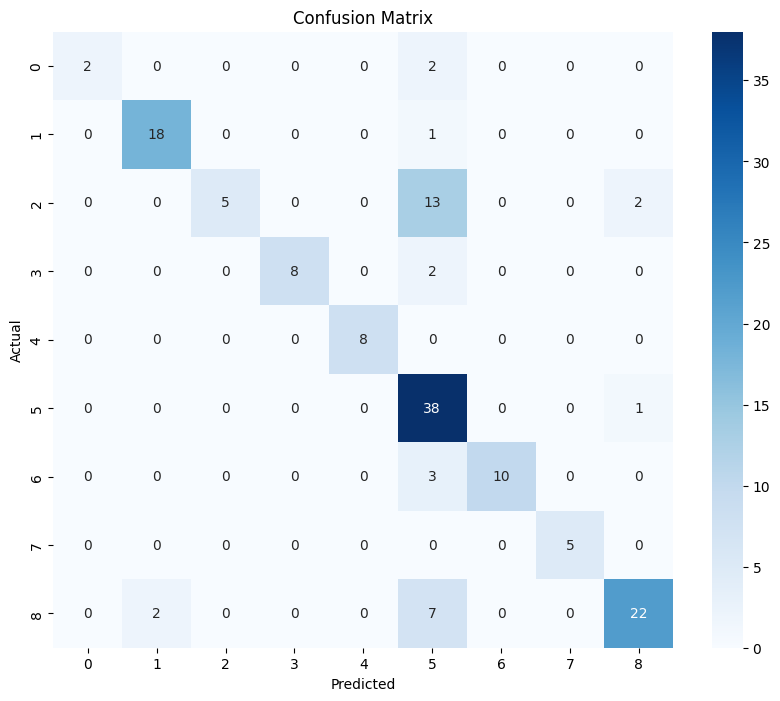

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Glassdoor_Jobs.csv')

# You might want to consider grouping rare sectors into an 'Other' category
min_sector_count = 25 # Adjust this threshold as needed
df['Sector'] = df['Sector'].apply(lambda x: x if sector_counts[x] >= min_sector_count else 'Other')

# 2. Split the data
X = df['Job Description']
y = df['Sector']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
# 3. Create a pipeline
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),('clf', RandomForestClassifier(n_estimators=100, random_state=42))])

# 4. Train the model
pipeline.fit(X_train, y_train)
# 5. Make predictions
y_pred = pipeline.predict(X_test)
# 6. Evaluate the model
print('Overall Accuracy of job sectors classifiication\n',classification_report(y_test, y_pred))
# 7. Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()


# find out the number of misclassifications on each job sector

In [24]:
import pandas as pd
# Load the dataset
df = pd.read_csv('Glassdoor_Jobs.csv')

actual_sector_col = 'Sector' 
classified_sector_col = 'Industry' 

misclassified_counts = df[df[actual_sector_col] !=df[classified_sector_col]][classified_sector_col].value_counts()
# Convert to DataFrame for better readability
misclassified_df = misclassified_counts.reset_index()
misclassified_df.columns = ['Sector', 'Misclassification Count']

# Sort by the number of misclassifications
misclassified_df = misclassified_df.sort_values(by='Misclassification Count',ascending=False)

print('Count the number of misclassifications on each job sector\n',misclassified_df)

Count the number of misclassifications on each job sector
                                       Sector  Misclassification Count
0                         Insurance Carriers                       63
1               Computer Hardware & Software                       59
2                                IT Services                       50
3           Health Care Services & Hospitals                       49
4    Enterprise Software & Network Solutions                       42
5                                 Consulting                       29
6                                   Internet                       29
7                    Advertising & Marketing                       25
8            Consumer Products Manufacturing                       20
9                     Research & Development                       19
10                   Colleges & Universities                       16
11                                    Energy                       14
12                     Banks & 

# Predict  likelihood of high applications for a new job posting

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('Glassdoor_Jobs.csv')

# Print column names to verify
print("Columns in the DataFrame:")
print(df.columns)




if 'avg_salary' not in df.columns:
    if 'min_salary' in df.columns and 'max_salary' in df.columns:
        df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2
    else:
        print("Warning: Unable to calculate average salary. Using a random proxy.")
        df['avg_salary'] = np.random.randint(1000, 150000, size=len(df))

# Create a proxy variable for 'high number of applications'
df['high_applications'] = ((df['Rating'] > df['Rating'].median()) & (df['Size'].astype(str).str.contains(r'10000\+', regex=True, na=False))).astype(int)

# Select features for the model
features = [ 'python_yn', 'R_yn', 'spark', 'aws', 'excel']
for col in features:
    if col not in df.columns:
        print(f"Warning: '{col}' column not found. Skipping this feature.")
features = [col for col in features if col in df.columns]

# Prepare the feature matrix X and target vector y
X = df[features]
y = df['high_applications']

# Handle missing values
X = X.fillna(X.mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': clf.feature_importances_}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)



# Function to predict likelihood of high applications for a new job posting
def predict_high_applications(job_attributes):
    if len(job_attributes) != len(features):
        raise ValueError(f"Expected {len(features)} features, but got {len(job_attributes)}")
    job_attributes_scaled = scaler.transform([job_attributes])
    probability = clf.predict_proba(job_attributes_scaled)[0][1]
    return probability

# Example usage
new_job = [1,1,1, 1,1]  # Adjust this based on your actual features
try:
    likelihood = predict_high_applications(new_job)
    print("\n prediction of high applications for the new job: ",likelihood)
except ValueError as e:
    print(f"Error: {e}")
    print("Please adjust the new_job list to match the number of features used in the model.")



Columns in the DataFrame:
Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       347
           1       0.00      0.00      0.00        24

    accuracy                           0.94       371
   macro avg       0.47      0.50      0.48       371
weighted avg       0.87      0.94      0.90       371


Feature Importance:
     feature  importance
3        aws    0.372175
0  python_yn    0.272143
2      spark    0.240731
4      excel    0.110800
1       R_yn    0.004152

 prediction of high appli

C:\Users\OM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\OM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\OM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\OM\anaconda3\Lib\site-packages\sklearn\b

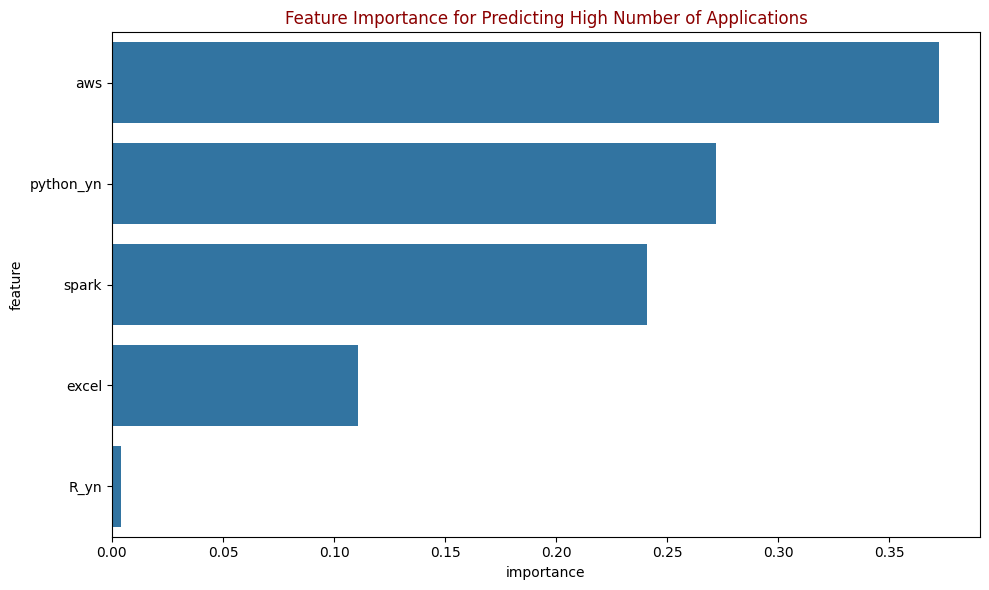

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

 #Visualizing feature importance for Predicting High Number of Applications
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Predicting High Number of Applications',color='darkred')
plt.tight_layout()
plt.show()



#      How does salary distribution vary across different industries and regions

                                   count      mean        std    min      25%  \
Industry                job_state                                               
Accounting              CA           1.0  113.5000        NaN  113.5  113.500   
Advertising & Marketing CA           4.0  139.2500  29.156189  114.0  114.000   
                        FL           4.0   81.2500  11.258330   71.5   71.500   
                        IL           1.0   87.5000        NaN   87.5   87.500   
                        MA           1.0   56.5000        NaN   56.5   56.500   
...                                  ...       ...        ...    ...      ...   
Wholesale               NY           1.0   76.5000        NaN   76.5   76.500   
                        WA           1.0   53.5000        NaN   53.5   53.500   
unknown                 CA           1.0   87.5000        NaN   87.5   87.500   
                        MA           8.0  118.5625   9.321394   98.5  119.375   
                        NY  

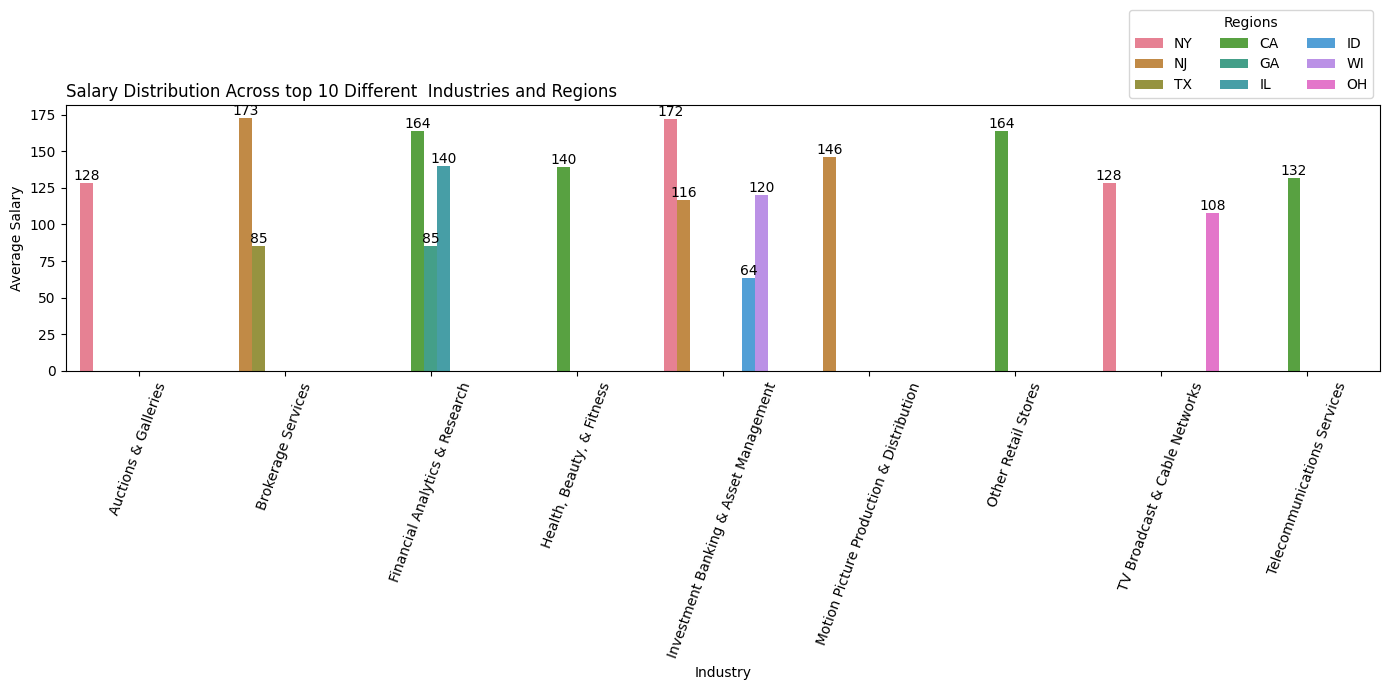

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv('Glassdoor_Jobs.csv')

df['job_state']=df['Location'].apply(lambda x:x.split(',')[-1].strip())

salary_distribution= df.groupby(['Industry','job_state'])['avg_salary'].describe()
print(salary_distribution)

avg_salary=df.groupby(['Industry','job_state'])['avg_salary'].mean().reset_index()

top_industries=avg_salary.groupby('Industry')['avg_salary'].mean().nlargest(9).index
top_avg_salary=avg_salary[avg_salary['Industry'].isin(top_industries)]

num_bars = top_avg_salary['Industry'].nunique() 
colors = sns.color_palette("husl", num_bars)


# Create a barplot for average salary of top 10 industries with unique colors
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(x='Industry', y='avg_salary',hue='job_state', data=top_avg_salary,palette=colors)
# Add values inside the bars
for p in bar_plot.containers:
    bar_plot.bar_label(p, label_type='edge', fmt='%.0f', fontsize=10, color='black')
# Set x-ticks rotation
plt.xticks(rotation=70)
# Set plot title and labelsplt.tight_layout()
plt.title('Salary Distribution Across top 10 Different  Industries and Regions',loc='left')
plt.ylabel('Average Salary')
plt.xlabel('Industry')
# Position the legend
plt.legend(title="Regions", loc='lower right', bbox_to_anchor=(1, 1), ncol=3)
plt.tight_layout()
plt.show()

# what are thea most commnon jobs associated with the high demand skill like python,aws etc. and how do their salary compare

In [22]:
import numpy as np
import pandas as pd
# Load the dataset
df = pd.read_csv('Glassdoor_Jobs.csv')


# Clean the Salary Estimate column to extract numeric values
def extract_salary(salary_estimate):
    if isinstance(salary_estimate, str):
        salary_estimate = salary_estimate.replace('Glassdoor est.','').strip()
        salary = salary_estimate.replace('$','').replace('K','').replace('(','').replace(')','').split('-')
        if len(salary)==2:
            try:
                min_salary=float(salary[1].strip())*1000
                max_salary=float(salary[0].strip())*1000
                return (min_salary, max_salary)
            except ValueError:
                return (np.nan, np.nan)
            else:
                return(np.nan, np.nan)

df["avg_salary"]=pd.to_numeric(df['avg_salary'],errors='coerce')
# Apply the salary extraction function
df[['min_salary', 'max_salary']] = df['Salary Estimate'].apply(extract_salary).apply(pd.Series)

# Calculate average salary
df["avg_salary"] = (df["min_salary"] + df["max_salary"]) / 2

# Define skills of interest
skills = ['python_yn', 'aws', 'spark', 'excel']

# Filter the DataFrame to include only rows with required skills
df_filtered = df[(df['python_yn'] == 1) | (df['aws'] == 1) | (df['spark'] == 1) | (df['excel'] == 1)]


    

# Identify the top job  with the specified skills and their respective average salaries
job_salary_analysis = df_filtered.groupby('Job Title')[["avg_salary"]+skills].mean().reset_index()
job_salary_analysis = job_salary_analysis.sort_values(by='avg_salary',ascending=False)
# Display the resulting DataFrame
print("Top job  with the specified skills and their respective average salaries\n")
job_salary_analysis.head(15)

Top job  with the specified skills and their respective average salaries



Job Title  avg_salary  python_yn  \
78           Director II, Data Science - GRM Actuarial    254000.0        1.0   
121               Principal Machine Learning Scientist    232500.0        1.0   
79   Director II, Data Science - GRS Predictive Ana...    194500.0        1.0   
194                    Staff Machine Learning Engineer    181000.0        1.0   
80                              Director, Data Science    179500.0        1.0   
118                           Principal Data Scientist    176300.0        0.6   
189                                   Sr. Scientist II    174000.0        0.0   
164                        Senior Quantitative Analyst    173000.0        1.0   
81   Director, Precision Medicine Clinical Biomarke...    172000.0        0.0   
193                               Staff Data Scientist    171500.0        1.0   
185  Sr. Data Scientist - Analytics, Personalized H...    169000.0        1.0   
144                       Scientist 2, QC Viral Vector    168000.0        0.0   
65                              Data Scientist - Sales    168000.0        1.0   
162       Senior Manager, Epidemiologic Data Scientist    167500.0        0.0   
153                 Senior Data Scientist - Algorithms    165000.0        1.0   

     aws  spark  excel  
78   0.0    0.0    0.0  
121  0.0    0.0    0.0  
79   0.0    0.0    0.0  
194  0.0    1.0    0.0  
80   0.0    0.0    1.0  
118  0.4    0.0    0.6  
189  0.0    0.0    1.0  
164  0.0    0.0    1.0  
81   1.0    0.0    0.0  
193  1.0    0.0    0.0  
185  0.0    1.0    1.0  
144  0.0    0.0    1.0  
65   0.0    0.0    1.0  
162  1.0    0.0    1.0  
153  0.0    0.0    0.0

# Determine the top 10 highest and lowest comapanies with average salary 

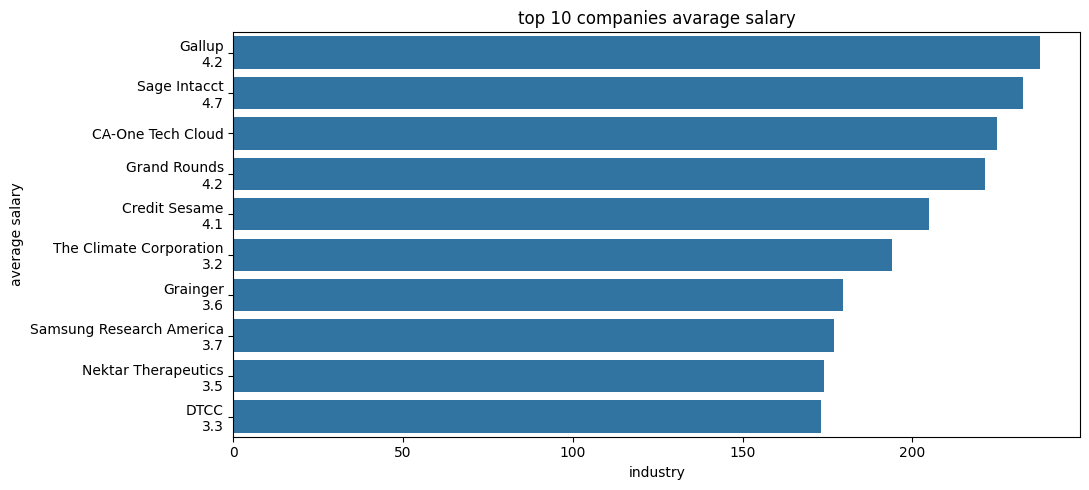

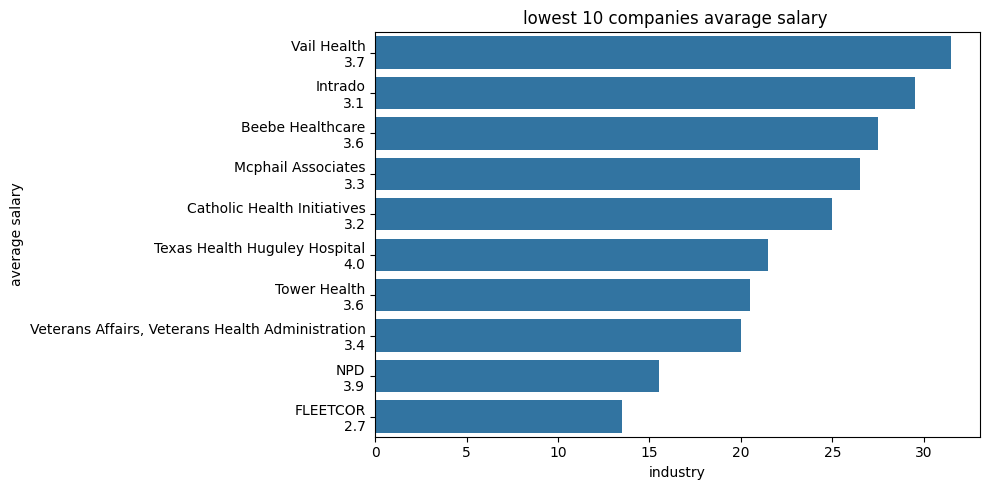

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv('Glassdoor_Jobs.csv')
company_salary=df.groupby('Company Name')['avg_salary'].mean().sort_values(ascending=False)

topcompanies=company_salary.head(10)
bottomcompanies=company_salary.tail(10)


plt.figure(figsize=(11,5))
sns.barplot(x=topcompanies.values,y=topcompanies.index)
plt.xticks(rotation=0)
plt.title('top 10 companies avarage salary')
plt.ylabel('average salary')
plt.xlabel('industry')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=bottomcompanies.values,y=bottomcompanies.index)
plt.xticks(rotation=0)
plt.title('lowest 10 companies avarage salary ')
plt.ylabel('average salary')
plt.xlabel('industry')
plt.tight_layout()
plt.show()


# visualize how does the comparing predicted salaries with actual salaries help to determine the accuracy of minimum ,maximum and average salary predictions based on job title,company name and location

Observed and predicted Minimum Maximum and Average salary Range
      observed min salary  predicted min salary  observed max salary  \
120                   77             75.724243                  124   
196                   35             62.366387                   62   
336                  109             92.378570                  200   
582                   93             99.464996                  151   
395                  121             91.387409                  203   
597                   72             91.075222                  142   
76                    79             86.325353                  222   
639                   32             67.391316                   57   
477                   42             74.881126                   77   
381                   37             74.882177                   66   

     predicted max salary  observed average salary  predicted average salary  
120             75.724243                    100.5                 75.7242

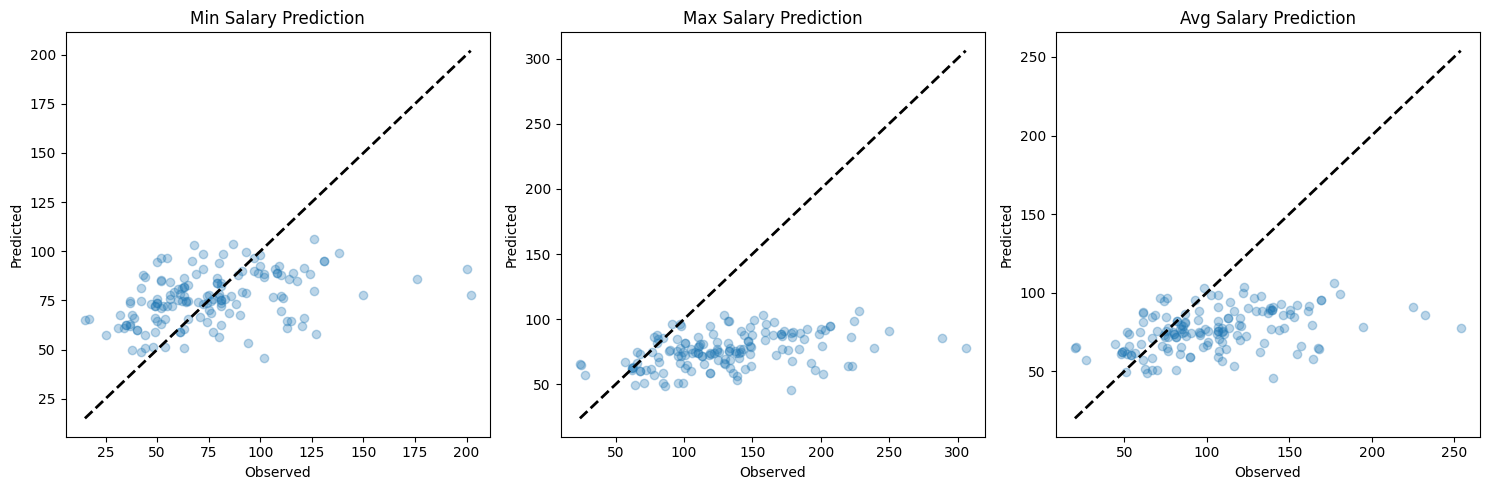

In [30]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression as lr
import matplotlib.pyplot as plt

df = pd.read_csv('Glassdoor_Jobs.csv')

# Assuming 'df' is your DataFrame
# Preprocess the data
df['min_salary'] = pd.to_numeric(df['min_salary'], errors='coerce')
df['max_salary'] = pd.to_numeric(df['max_salary'], errors='coerce')
df['avg_salary'] = pd.to_numeric(df['avg_salary'], errors='coerce')

# Drop rows with missing salary information
df = df.dropna(subset=['min_salary', 'max_salary', 'avg_salary'])

# Encode categorical variables
le_job_title = LabelEncoder()
df['job_title_encoded'] = le_job_title.fit_transform(df['Job Title'])
le_company = LabelEncoder()
df['company_encoded'] = le_company.fit_transform(df['Company Name'])
le_location = LabelEncoder()
df['location_encoded'] = le_location.fit_transform(df['Location'])

# Define features and target variables
features = ['job_title_encoded', 'company_encoded', 'location_encoded', 'python_yn', 'spark','aws', 'excel']
X = df[features]
y_min = df['min_salary']
y_max = df['max_salary']
y_avg = df['avg_salary']

# Split the data into training and testing sets
X_train, X_test, y_min_train, y_min_test = train_test_split(X, y_min, test_size=0.2,random_state=42)
_, _, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=42)
_, _, y_avg_train, y_avg_test = train_test_split(X, y_avg, test_size=0.2, random_state=42)


model_min=lr()
model_min.fit(X_train,y_min_train)

model_max=lr()
model_max.fit(X_train,y_min_train)

model_avg=lr()
model_avg.fit(X_train,y_min_train)

y_min_pred=model_min.predict(X_test)
y_max_pred=model_max.predict(X_test)
y_avg_pred=model_avg.predict(X_test)

d={
    "observed min salary":y_min_test[:10],
    "predicted min salary":y_min_pred[:10],
    "observed max salary":y_max_test[:10],
    "predicted max salary":y_max_pred[:10],
    "observed average salary":y_avg_test[:10],
    "predicted average salary":y_avg_pred[:10],
}

df_result=pd.DataFrame(d)
print("Observed and predicted Minimum Maximum and Average salary Range\n",df_result)
# Visualize the salary predictions

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_min_test, y_min_pred, alpha=0.3)
plt.plot([y_min_test.min(), y_min_test.max()], [y_min_test.min(), y_min_test.max()], 'k--',lw=2)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Min Salary Prediction')

plt.subplot(1, 3, 2)
plt.scatter(y_max_test, y_max_pred, alpha=0.3)
plt.plot([y_max_test.min(), y_max_test.max()], [y_max_test.min(), y_max_test.max()], 'k--',lw=2)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Max Salary Prediction')
plt.subplot(1, 3, 3)

plt.scatter(y_avg_test, y_avg_pred, alpha=0.3)
plt.plot([y_avg_test.min(), y_avg_test.max()], [y_avg_test.min(), y_avg_test.max()], 'k--',lw=2)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Avg Salary Prediction')
plt.tight_layout()
plt.show()

# visualize how does by comparing the observed and predicted company ratings help to evaluate the accuracy and effectiveness of the ratings?

Mean Squared Error: 893.4105873752203
R Squared Score: 0.14916525821886695


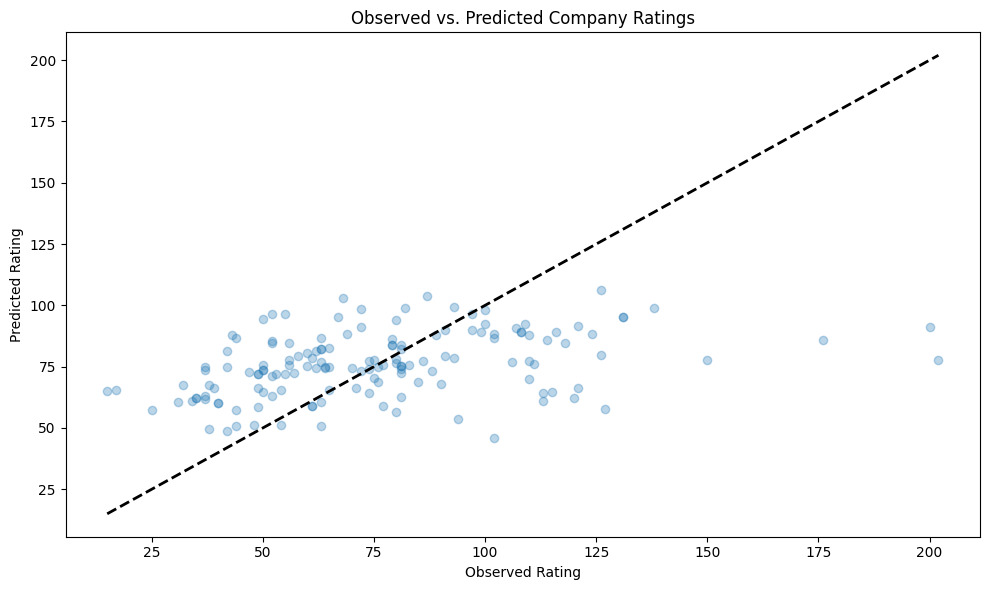

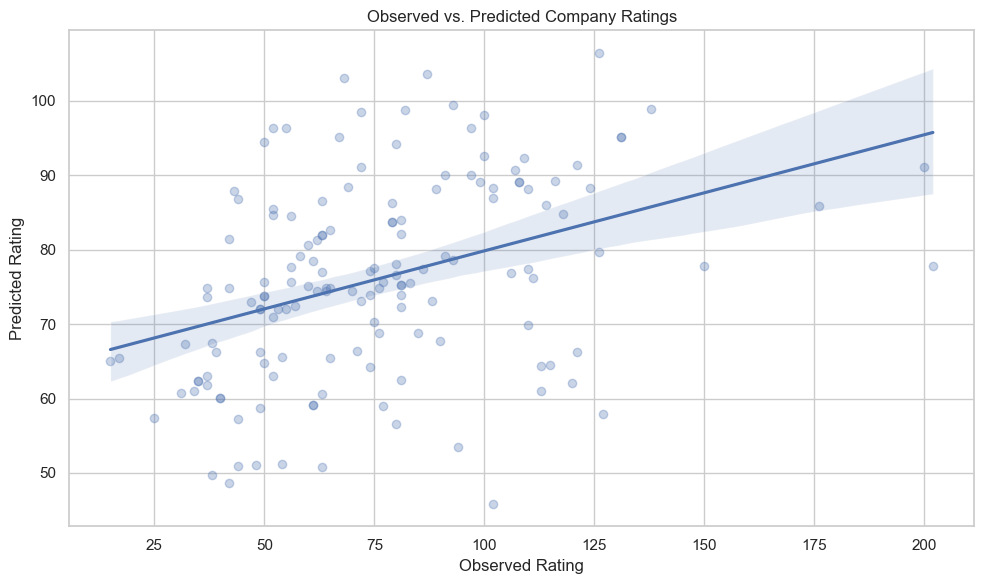

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Glassdoor_Jobs.csv')
X=df.drop(columns=['Rating'])



# Assuming 'df' is your DataFrame
# Preprocess the data
df['min_salary'] = pd.to_numeric(df['min_salary'], errors='coerce')
df['max_salary'] = pd.to_numeric(df['max_salary'], errors='coerce')
df['avg_salary'] = pd.to_numeric(df['avg_salary'], errors='coerce')

# Drop rows with missing salary information
df = df.dropna(subset=['min_salary', 'max_salary', 'avg_salary'])

# Encode categorical variables
le_job_title = LabelEncoder()
df['job_title_encoded'] = le_job_title.fit_transform(df['Job Title'])
le_company = LabelEncoder()
df['company_encoded'] = le_company.fit_transform(df['Company Name'])
le_location = LabelEncoder()
df['location_encoded'] = le_location.fit_transform(df['Location'])

# Define features and target variables
features = ['job_title_encoded', 'company_encoded', 'location_encoded', 'python_yn', 'spark','aws', 'excel']
X = df[features]
y=df['Rating']
y_min = df['min_salary']
y_max = df['max_salary']
y_avg = df['avg_salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_min, test_size=0.2,random_state=42)
_, _, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=42)
_, _, y_avg_train, y_avg_test = train_test_split(X, y_avg, test_size=0.2, random_state=42)
 
model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R Squared Score:", r2)

# Predict company ratings
# Visualize the observed vs. predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Observed Rating')
plt.ylabel('Predicted Rating')
plt.title('Observed vs. Predicted Company Ratings')
plt.tight_layout()
plt.show()

# Additional visualization with Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha":0.3})
plt.xlabel('Observed Rating')
plt.ylabel('Predicted Rating')
plt.title('Observed vs. Predicted Company Ratings')
plt.tight_layout()
plt.show()